In [1]:
from sqlalchemy import create_engine
from sqlalchemy import text
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


In [4]:
engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="sciBow1237",
    host="localhost",
    port=5432,
    database="sqlda"))

#SQLAlchemy 2.0 syntax
with engine.begin() as connection:
    connection.execute(text("SELECT * FROM movies LIMIT 2;")).fetchall()

[(1, 4, 'Iron Man', datetime.date(2008, 5, 2), 126, 1, 1),
 (2, 6, 'The Incredible Hulk', datetime.date(2008, 6, 13), 112, 1, 1)]

In [5]:
mps_data = pd.read_sql_table('movies_plus_soundtracks',engine)
mps_data

,chron_num,timeline_num,title,release_date,runtime_min,phase_id,saga_name,first_name,last_name,track_count,duration_min,downloaded_tracks,downloaded_duration
0,23,26,Spider-Man: Far From Home,2019-07-02,129,3,The Infinity Saga,Michael,Giacchino,25,80,16,53
1,22,24,Avengers: Endgame,2019-04-26,181,3,The Infinity Saga,Alan,Silvestri,35,117,17,58
2,21,3,Captain Marvel,2019-03-08,124,3,The Infinity Saga,Pinar,Toprak,23,68,12,44
3,20,22,Ant-Man and the Wasp,2018-07-06,118,3,The Infinity Saga,Christophe,Beck,25,56,14,34
4,19,23,Avengers: Infinity War,2018-04-27,149,3,The Infinity Saga,Alan,Silvestri,30,117,18,69
5,18,18,Black Panther,2018-02-16,134,3,The Infinity Saga,Ludwig,Gӧransson,28,95,15,57
6,17,21,Thor: Ragnarok,2017-11-03,130,3,The Infinity Saga,Mark,Mothersbaugh,23,73,14,46
7,16,19,Spider-Man: Homecoming,2017-07-07,133,3,The Infinity Saga,Michael,Giacchino,22,67,15,43
8,15,13,Guardians of the Galaxy Vol. 2,2017-05-05,136,3,The Infinity Saga,Tyler,Bates,19,44,12,27
9,14,20,Doctor Strange,2016-11-04,115,3,The Infinity Saga,Michael,Giacchino,19,66,10,42


In [6]:
# Performing a query using the RANK() function to rank the movies that had the highest amount of songs for their respective soundtrack
track_rank_query = """SELECT title, track_count,
                      RANK() OVER (ORDER BY track_count DESC) AS track_rank
                      FROM movies_plus_soundtracks"""

In [9]:
longest_tracks_data = pd.read_sql_query(track_rank_query, engine)
longest_tracks_data

,title,track_count,track_rank
0,The Incredible Hulk,45,1
1,Doctor Strange in the Multiverse of Madness,35,2
2,Avengers: Endgame,35,2
3,Captain America: Brave New World,35,2
4,Deadpool & Wolverine,33,5
5,Thunderbolts*,32,6
6,Ant-Man,31,7
7,Avengers: Infinity War,30,8
8,Guardians of the Galaxy,29,9
9,Avengers: Age of Ultron,29,9


In [10]:
# Performing a query using the DENSE_RANK() function to rank the movies, via its phase, that had the highest amount of songs for their respective soundtrack
track_phase_rank_query = """SELECT title, track_count, phase_id,
                            DENSE_RANK() OVER (PARTITION BY phase_id ORDER BY track_count DESC) AS track_rank
                            FROM movies_plus_soundtracks"""

In [11]:
longest_tracks_phase_data = pd.read_sql_query(track_phase_rank_query, engine)
longest_tracks_phase_data

,title,track_count,phase_id,track_rank
0,The Incredible Hulk,45,1,1
1,Captain America: The First Avenger,27,1,2
2,Iron Man 2,25,1,3
3,Thor,24,1,4
4,Iron Man,19,1,5
5,The Avengers,18,1,6
6,Ant-Man,31,2,1
7,Avengers: Age of Ultron,29,2,2
8,Avengers: Age of Ultron,29,2,2
9,Guardians of the Galaxy,29,2,2


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='phase_id', ylabel='track_count'>

Text(0.5, 1.0, 'Number of Soundtrack Songs per Movie by MCU Phase')

Text(0.5, 0, 'MCU Phase')

Text(0, 0.5, 'Number of Songs (Track Count)')

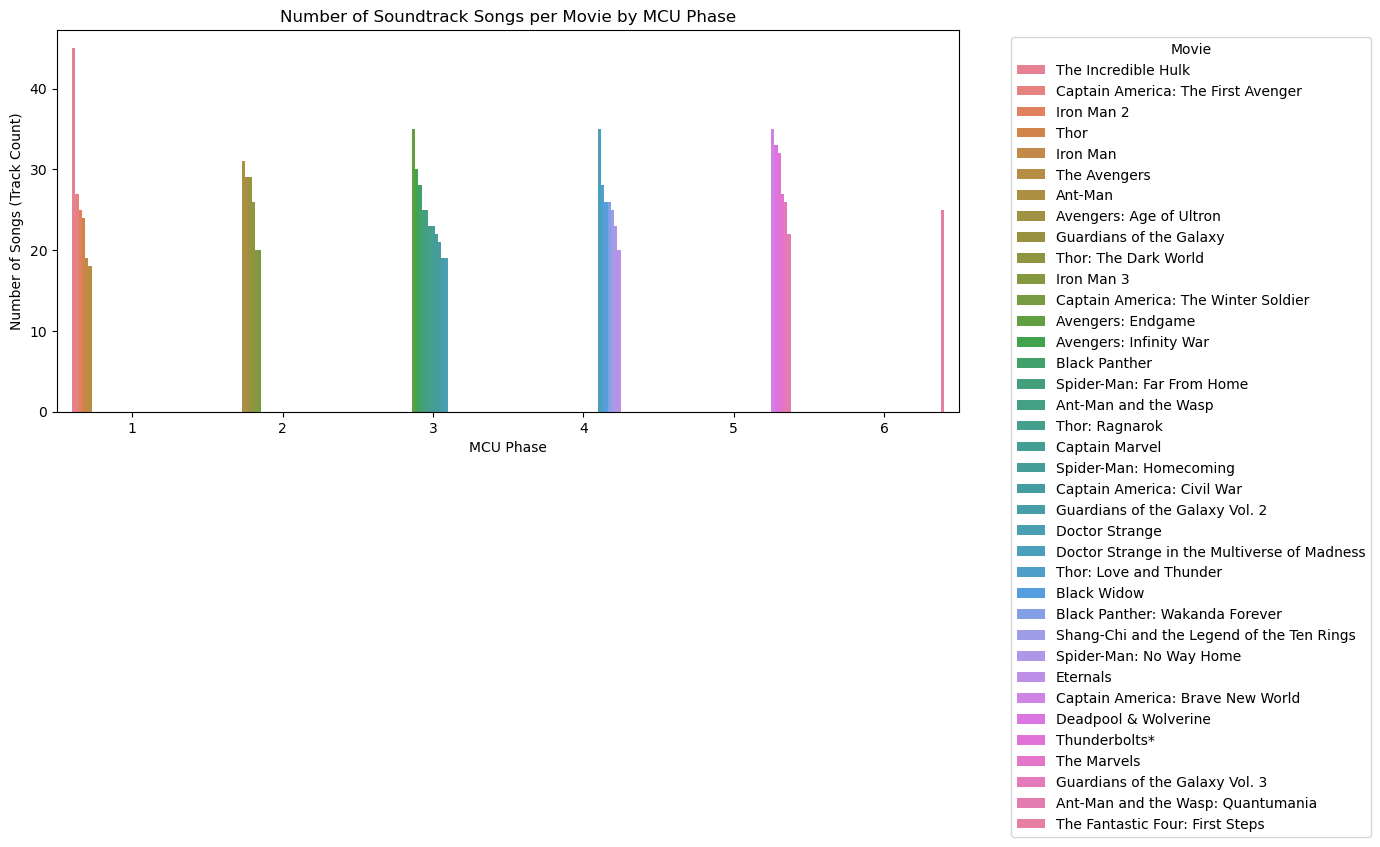

In [30]:
plt.figure(figsize=(14,7))

sns.barplot(x = "phase_id",
            y = "track_count",
            data = longest_tracks_phase_data,
            hue = "title")

plt.title("Number of Soundtrack Songs per Movie by MCU Phase")
plt.xlabel("MCU Phase")
plt.ylabel("Number of Songs (Track Count)")
plt.legend(title = "Movie", bbox_to_anchor = (1.05, 1), loc = 'upper left')

plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

<Axes: xlabel='phase_id', ylabel='track_count'>

Text(0.5, 1.0, 'Highest Song Count Movies per MCU Phase (Ranked)')

Text(0.5, 0, 'MCU Phase')

Text(0, 0.5, 'Number of Songs')

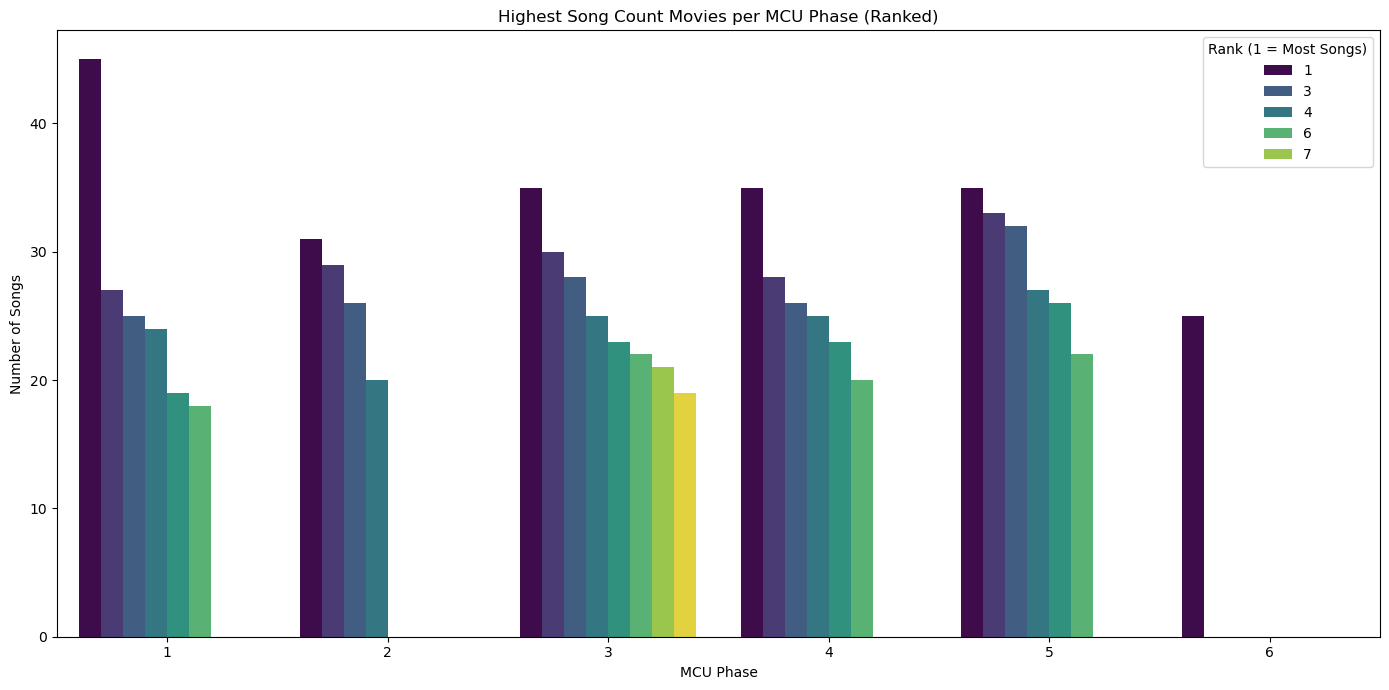

In [31]:
plt.figure(figsize=(14,7))

sns.barplot(x = "phase_id",
            y = "track_count",
            data = longest_tracks_phase_data,
            hue = "track_rank",
            palette = "viridis")

plt.title("Highest Song Count Movies per MCU Phase (Ranked)")
plt.xlabel("MCU Phase")
plt.ylabel("Number of Songs")
plt.legend(title = "Rank (1 = Most Songs)")

plt.tight_layout()
plt.show()

In [17]:
# Performing a query using the DENSE_RANK() function to rank the movies, via its saga, that had the highest amount of songs for their respective soundtrack

track_saga_rank = """SELECT title, track_count, saga_name,
                     DENSE_RANK() OVER (PARTITION BY saga_name ORDER BY track_count DESC) AS track_rank
                     FROM movies_plus_soundtracks"""

In [18]:
longest_tracks_saga_data = pd.read_sql_query(track_saga_rank, engine)
longest_tracks_saga_data

,title,track_count,saga_name,track_rank
0,The Incredible Hulk,45,The Infinity Saga,1
1,Avengers: Endgame,35,The Infinity Saga,2
2,Ant-Man,31,The Infinity Saga,3
3,Avengers: Infinity War,30,The Infinity Saga,4
4,Avengers: Age of Ultron,29,The Infinity Saga,5
5,Guardians of the Galaxy,29,The Infinity Saga,5
6,Avengers: Age of Ultron,29,The Infinity Saga,5
7,Black Panther,28,The Infinity Saga,6
8,Captain America: The First Avenger,27,The Infinity Saga,7
9,Thor: The Dark World,26,The Infinity Saga,8
